<a href="https://colab.research.google.com/github/annycruzsalcedo/2023-Predictive-Analytics/blob/main/Diamonds_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1



#Task 1: Define the Problem

In [1]:
# In this notebook we are going to predict diamond prices, having as features: carat, depth, table, x, y and z.

#Task 2a: Install the Needed Libraries

In [2]:
#n/a

#Task 2b: Import the Needed Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pickle

sns.set()


#Task 3: Load the Data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/annycruzsalcedo/2023-Predictive-Analytics/main/diamonds.csv', na_values = ['NA', '?'])

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Get Data Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##Find Missing Values

#Task 5: Perform Data Cleaning

In [8]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

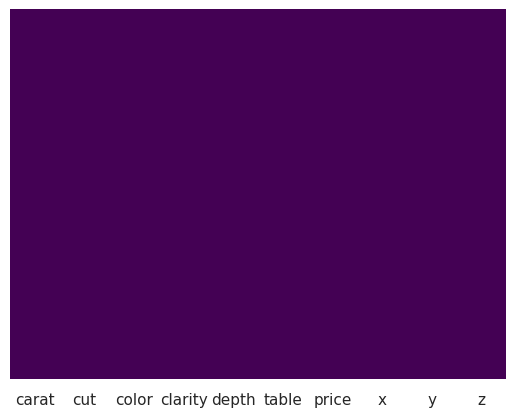

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#Task 6: Visualize Cleaned up Dataset

Text(0.5, 0, 'Price')

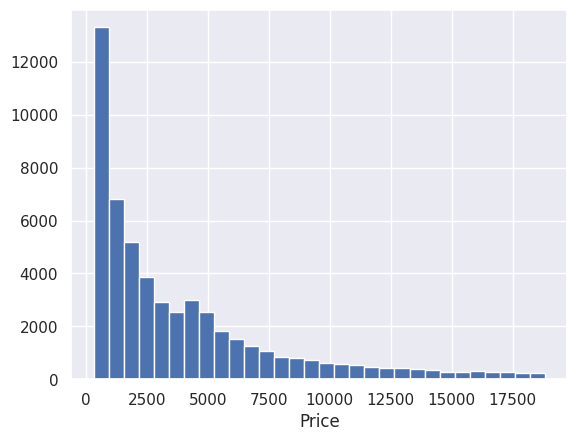

In [10]:
data['price'].hist(bins=30)
plt.xlabel('Price')

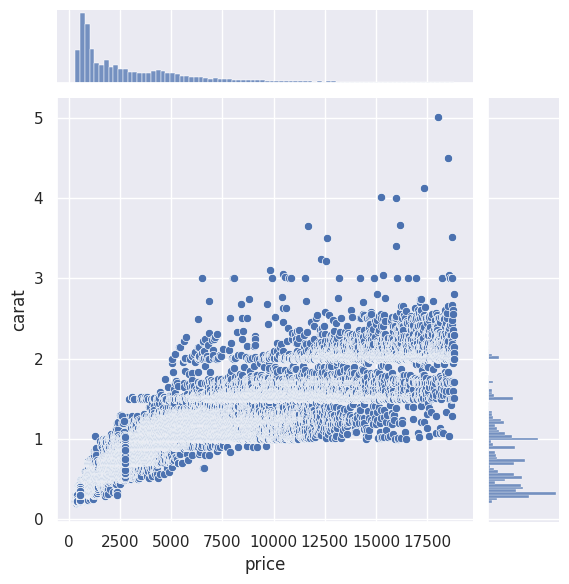

In [11]:
sns.jointplot(x='price',y='carat',data=data)

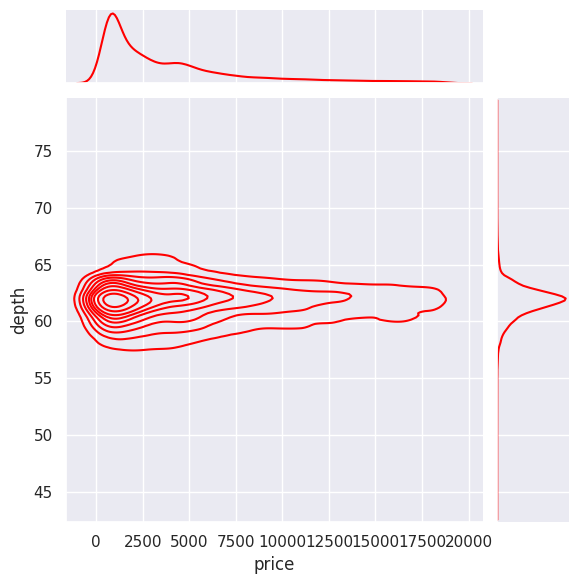

In [12]:
sns.jointplot(x='price',y='depth',data=data,color='red', kind='kde');

#Task 7: Conceptualize the problem

In [13]:
# Need to find out the price of diamonds!

#Task 8: Perform Data-Split

In [14]:
numeric_list = data.select_dtypes(include=[np.number]).columns
data[numeric_list] = data[numeric_list].astype(np.float32)

In [15]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75


#Task 9: Choose the ML Method to follow

In [16]:
x = data[['carat', 'depth', 'table', 'x', 'y', 'z']].values
y = data['price'].values

In [17]:
type(y)

numpy.ndarray

In [18]:
type(x)

numpy.ndarray

#Task 10: Train the ML Model

In [19]:
# Split data into train sets and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [20]:
print(f'The shape of the data is: \nx_train: \t{x_train.shape} \nx_test: \t{x_test.shape} \ny_train: \t{y_train.shape} \ny_test: \t{y_test.shape}')

The shape of the data is: 
x_train: 	(43152, 6) 
x_test: 	(10788, 6) 
y_train: 	(43152,) 
y_test: 	(10788,)


In [21]:
LinearRegression_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()

In [22]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is trained!


In [23]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_XGBoost = XGBRegressor_model.score(x_test, y_test)

In [24]:
models = {'LinearRegression_model': accuracy_LinearRegression, 'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest,
          'XGBRegressor_model': accuracy_XGBoost}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the LinearRegression_model is 86.07%
The accuracy score for the DecisionTree_model is 77.91%
The accuracy score for the RandomForest_model is 88.78%
The accuracy score for the XGBRegressor_model is 89.01%


In [25]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75


In [26]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#Task 11: Test the Model

In [27]:
test_x = np.zeros((1, 6))
test_x

array([[0., 0., 0., 0., 0., 0.]])

In [28]:
# test_x = np.zeros((1, 6))

# test_x[0, 0] = 0.29      # carat
# test_x[0, 1] = 61.500000    # depth
# test_x[0, 2] = 58.0    # table
# test_x[0, 3] = 4.20   # x
# test_x[0, 4] = 4.23     # y
# test_x[0, 5] = 2.63     # z
# test_x

test_x = np.zeros((1, 6))

test_x[0, 0] = 0.23
test_x[0, 1] = 56.900002
test_x[0, 2] = 65.0
test_x[0, 3] = 4.05
test_x[0, 4] = 4.07
test_x[0, 5] = 2.31
test_x

array([[ 0.23    , 56.900002, 65.      ,  4.05    ,  4.07    ,  2.31    ]])

In [29]:
prediction = LinearRegression_model.predict(test_x)
round(float(prediction[0]), 2)

132.59

In [30]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]

In [31]:
for model in models:
    prediction = model.predict(test_x)
    print(f'The model {model} predicts a price of {round(float(prediction[0]), 2)}')

The model LinearRegression() predicts a price of 132.59
The model DecisionTreeRegressor() predicts a price of 327.0
The model RandomForestRegressor() predicts a price of 379.04
The model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) predicts a price of 449.65


In [32]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
mdl_file_v3 = '/content/drive/MyDrive/Colab Notebooks/Predictive Analytics/In-class assignments and examples'

In [35]:
with open('mdl_file_v3', 'wb') as file:
    model = pickle.dump(LinearRegression_model, file)

In [36]:
# Using nn
test_x = np.zeros((1, 6))

test_x[0, 0] = 0.23
test_x[0, 1] = 56.900002
test_x[0, 2] = 65.0
test_x[0, 3] = 4.05
test_x[0, 4] = 4.07
test_x[0, 5] = 2.31
test_x

array([[ 0.23    , 56.900002, 65.      ,  4.05    ,  4.07    ,  2.31    ]])

In [37]:
#need to run part 2 completely before running this line bc the model hasn't been established yet
prediction = model.predict(test_x)
round(float(prediction[0]), 2)

AttributeError: ignored

# Part 2

In [38]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
model = Sequential()
model.add(Dense(25, input_dim = x.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

In [40]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [41]:
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)

In [43]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

Epoch 1/1000
1349/1349 - 3s - loss: 14868832.0000 - val_loss: 14533282.0000 - 3s/epoch - 3ms/step
Epoch 2/1000
1349/1349 - 4s - loss: 14061175.0000 - val_loss: 13485236.0000 - 4s/epoch - 3ms/step
Epoch 3/1000
1349/1349 - 3s - loss: 12539075.0000 - val_loss: 11292928.0000 - 3s/epoch - 2ms/step
Epoch 4/1000
1349/1349 - 3s - loss: 9293958.0000 - val_loss: 6940944.0000 - 3s/epoch - 2ms/step
Epoch 5/1000
1349/1349 - 3s - loss: 4847285.5000 - val_loss: 3554827.5000 - 3s/epoch - 2ms/step
Epoch 6/1000
1349/1349 - 2s - loss: 2897238.2500 - val_loss: 2775993.7500 - 2s/epoch - 2ms/step
Epoch 7/1000
1349/1349 - 2s - loss: 2343271.7500 - val_loss: 2640518.0000 - 2s/epoch - 2ms/step
Epoch 8/1000
1349/1349 - 3s - loss: 2220932.5000 - val_loss: 2678834.0000 - 3s/epoch - 2ms/step
Epoch 9/1000
1349/1349 - 3s - loss: 2187994.7500 - val_loss: 2656712.0000 - 3s/epoch - 3ms/step
Epoch 10/1000
1349/1349 - 3s - loss: 2174174.7500 - val_loss: 2667789.5000 - 3s/epoch - 2ms/step
Epoch 11/1000
1349/1349 - 2s - lo

In [44]:
prediction = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(prediction, y_test))
print(f'After training the score is: {score}')

338/338 [==============================] - 1s 1ms/step
After training the score is: 1624.9674072265625


In [45]:
col = [x for x in data.columns if x not in ('price', 'cut', 'color', 'clarity')]
# col

# Normal loop way
print('{')
for i, name in enumerate(col):
    print(f'"{name}":{{"min":{data[name].min()}, "max":{data[name].max()}}}{"," if i < (len(col)-1) else ""}')
print('}')

{
"carat":{"min":0.20000000298023224, "max":5.010000228881836},
"depth":{"min":43.0, "max":79.0},
"table":{"min":43.0, "max":95.0},
"x":{"min":0.0, "max":10.739999771118164},
"y":{"min":0.0, "max":58.900001525878906},
"z":{"min":0.0, "max":31.799999237060547}
}


In [46]:
model.save('price_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                175       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 446 (1.74 KB)
Trainable params: 446 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


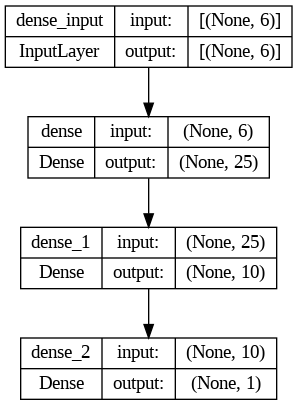

In [48]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [49]:
test_x = np.zeros((1, 6))

test_x[0, 0] = 0.23
test_x[0, 1] = 56.900002
test_x[0, 2] = 65.0
test_x[0, 3] = 4.05
test_x[0, 4] = 4.07
test_x[0, 5] = 2.31
test_x

array([[ 0.23    , 56.900002, 65.      ,  4.05    ,  4.07    ,  2.31    ]])

In [50]:
prediction = model.predict(test_x)
round(float(prediction[0]), 2)

1/1 [==============================] - 0s 26ms/step


934.8